In [1]:
##################################
#Prediction of Downlink Throughput
##################################
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import plotly.graph_objects as go

In [2]:
from google.colab import files # remove if not being run from Colab
files.upload()

Saving amCharts (3).csv to amCharts (3).csv


{'amCharts (3).csv': b'TEST_PERIOD,TEST_PERIOD_FORMATTED,ATT_CONSISTANCY_1_5MB_MV,ATT_CONSISTANCY_5MB_MV,ATT_FAILED_PCT_MV,ATT_FAILED_TESTS_MV,ATT_HOSTED_PCT_MV,ATT_JITTER_MV,ATT_LATENCY_MV,ATT_NEW_USER_PCT_MV,ATT_NEW_USERS_MV,ATT_SPEEDSCORE_MV,ATT_TEST_COUNT_MV,ATT_TNOL_MV,ATT_TNONR_MV,ATT_TP_DL_MV,ATT_TP_DL_GT100_MV,ATT_TP_DL_GT100_PCT_MV,ATT_TP_DL_GT200_MV,ATT_TP_DL_GT200_PCT_MV,ATT_TP_DL_GT300_MV,ATT_TP_DL_GT300_PCT_MV,ATT_TP_DL_GT750_MV,ATT_TP_DL_PCT10_MV,ATT_TP_DL_PCT25_MV,ATT_TP_DL_PCT50_MV,ATT_TP_DL_PCT75_MV,ATT_TP_DL_PCT90_MV,ATT_TP_UL_MV,ATT_TP_UL_PCT50_MV,ATT_USER_COUNT_MV,SP_CONSISTANCY_1_5MB_MV,SP_CONSISTANCY_5MB_MV,SP_FAILED_PCT_MV,SP_FAILED_TESTS_MV,SP_HOSTED_PCT_MV,SP_JITTER_MV,SP_LATENCY_MV,SP_NEW_USER_PCT_MV,SP_NEW_USERS_MV,SP_SPEEDSCORE_MV,SP_TEST_COUNT_MV,SP_TNOL_MV,SP_TNONR_MV,SP_TP_DL_MV,SP_TP_DL_GT100_MV,SP_TP_DL_GT100_PCT_MV,SP_TP_DL_GT200_MV,SP_TP_DL_GT200_PCT_MV,SP_TP_DL_GT300_MV,SP_TP_DL_GT300_PCT_MV,SP_TP_DL_GT750_MV,SP_TP_DL_PCT10_MV,SP_TP_DL_PCT25_MV,SP_TP

In [5]:
###Load and display dataset
dataframe = pandas.read_csv('amCharts (3).csv')
def display_n(dataframe,n): 
    with pandas.option_context('display.max_rows',n*5):
        display(dataframe)

display_n(dataframe,2)
dataframe = dataframe[['TEST_PERIOD_FORMATTED', 'ATT_TP_DL_MV']]
dataframe = dataframe.dropna()
dataframe['TEST_PERIOD_FORMATTED'] = pandas.to_datetime(dataframe['TEST_PERIOD_FORMATTED'])

,TEST_PERIOD,TEST_PERIOD_FORMATTED,ATT_CONSISTANCY_1_5MB_MV,ATT_CONSISTANCY_5MB_MV,ATT_FAILED_PCT_MV,ATT_FAILED_TESTS_MV,ATT_HOSTED_PCT_MV,ATT_JITTER_MV,ATT_LATENCY_MV,ATT_NEW_USER_PCT_MV,...,VZ_BINS100M_SUB6_MID_MV,TMO_BINS100M_SUB6_LOW_MV,ATT_BINS100M_SUB6_LOW_MV,SP_BINS100M_SUB6_LOW_MV,VZ_BINS100M_SUB6_LOW_MV,TMO_BINS100M_MMWAVE_MV,SP_BINS100M_MMWAVE_MV,FN_BINS100M_MMWAVE_MV,FN_BINS100M_SUB6_LOW_MV,FN_BINS100M_SUB6_MID_MV
0,19/07/02,02-Jul-19,93.84,82.70,31.26,8584.0,54.09,47.96,49.94,87.79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19/07/03,03-Jul-19,94.99,84.37,27.97,9350.0,53.04,49.46,48.09,85.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19/07/04,04-Jul-19,93.34,82.48,33.16,8516.0,51.19,61.74,55.04,80.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19/07/05,05-Jul-19,92.20,80.83,31.86,8598.0,52.50,53.09,54.80,74.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19/07/06,06-Jul-19,93.85,83.40,31.63,8161.0,53.37,50.86,54.13,73.72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,22/07/29,29-Jul-22,96.30,88.81,NaN,NaN,64.29,29.67,41.55,47.48,...,800.0,1813800.0,1282300.0,10400.0,1775500.0,24700.0,NaN,NaN,78300.0,NaN
1123,22/07/30,30-Jul-22,96.23,89.44,NaN,NaN,61.35,28.81,41.19,46.76,...,200.0,1755700.0,1201200.0,8300.0,1633600.0,15400.0,NaN,NaN,60500.0,NaN
1124,22/07/31,31-Jul-22,96.39,89.39,NaN,NaN,66.05,31.28,42.07,47.22,...,100.0,658100.0,247000.0,3400.0,430800.0,9600.0,100.0,NaN,12000.0,NaN
1125,22/08/01,01-Aug-22,96.63,89.33,NaN,NaN,65.21,25.67,40.79,44.71,...,200.0,1646100.0,1169400.0,9700.0,1599600.0,20500.0,100.0,NaN,68000.0,NaN


In [6]:
###PLotting the data
fig = go.Figure()
fig.add_trace(go.Scatter(x=dataframe['TEST_PERIOD_FORMATTED'], y=dataframe['ATT_TP_DL_MV'], name='DL Throughput'))
fig.update_layout(showlegend=True, title='ATT DL Throughput 2019-2022')
fig.show()

In [7]:
# normalize the dataset
dataset = dataframe[['ATT_TP_DL_MV']]
dataset = dataset.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


In [8]:
print(dataframe['TEST_PERIOD_FORMATTED'])

0      2019-07-02
1      2019-07-03
2      2019-07-04
3      2019-07-05
4      2019-07-06
          ...    
1122   2022-07-29
1123   2022-07-30
1124   2022-07-31
1125   2022-08-01
1126   2022-08-02
Name: TEST_PERIOD_FORMATTED, Length: 1115, dtype: datetime64[ns]


In [9]:
print(dataset.reshape((-1)))

[0.04145181 0.03609681 0.03213012 ... 0.9593417  0.9315749  0.8996431 ]


In [10]:
# split into train and test sets
train_size = int(len(dataset) * 0.95)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

1059 56


In [11]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [12]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [13]:
print(train)

[[0.04145181]
 [0.03609681]
 [0.03213012]
 ...
 [0.9145182 ]
 [0.79730266]
 [0.8054344 ]]


In [14]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [15]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
1057/1057 - 4s - loss: 0.0421 - 4s/epoch - 3ms/step
Epoch 2/100
1057/1057 - 2s - loss: 0.0033 - 2s/epoch - 2ms/step
Epoch 3/100
1057/1057 - 2s - loss: 0.0016 - 2s/epoch - 2ms/step
Epoch 4/100
1057/1057 - 1s - loss: 0.0017 - 1s/epoch - 1ms/step
Epoch 5/100
1057/1057 - 2s - loss: 0.0016 - 2s/epoch - 1ms/step
Epoch 6/100
1057/1057 - 2s - loss: 0.0017 - 2s/epoch - 1ms/step
Epoch 7/100
1057/1057 - 1s - loss: 0.0016 - 1s/epoch - 1ms/step
Epoch 8/100
1057/1057 - 2s - loss: 0.0016 - 2s/epoch - 1ms/step
Epoch 9/100
1057/1057 - 2s - loss: 0.0017 - 2s/epoch - 1ms/step
Epoch 10/100
1057/1057 - 2s - loss: 0.0017 - 2s/epoch - 2ms/step
Epoch 11/100
1057/1057 - 2s - loss: 0.0016 - 2s/epoch - 1ms/step
Epoch 12/100
1057/1057 - 2s - loss: 0.0017 - 2s/epoch - 1ms/step
Epoch 13/100
1057/1057 - 2s - loss: 0.0016 - 2s/epoch - 1ms/step
Epoch 14/100
1057/1057 - 2s - loss: 0.0017 - 2s/epoch - 1ms/step
Epoch 15/100
1057/1057 - 2s - loss: 0.0017 - 2s/epoch - 1ms/step
Epoch 16/100
1057/1057 - 2s - loss

In [16]:
trainY.shape

(1057,)

In [17]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
print(trainY.shape)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], 1.035*testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

(1057,)
Train Score: 2.15 RMSE
Test Score: 2.67 RMSE


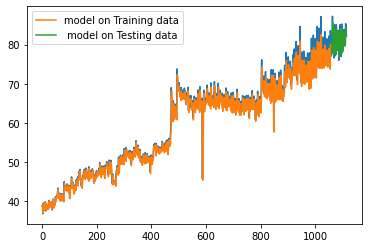

In [23]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
scaling_factor = 1.035
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot, label = 'model on Training data')
plt.plot(scaling_factor*testPredictPlot,label = ' model on Testing data')
plt.legend(loc="upper left")
plt.show()

In [ ]:
#################################################################################################
#To predict future values, pass the future dates similar to how it has been done on the test data
#The model requires more data to accurately predict further in the future
#################################################################################################